In [106]:
from os import getcwd, walk
from pandas import read_csv, concat
from plotnine import ggplot, aes, geom_point, theme_bw

In [107]:
data_sets = []  # List for storing the data set locations
data_sets_directory = f"{getcwd()}/datasets" # Home directory of the data 
for (root, dirs, files) in walk(data_sets_directory):    # Looping over directories 
    for file in files:  # Looping through the files 
        file_path = root + "/" + file   # Setting up the path 
        data_sets.append(file_path)  # Extending the stored directoriess

In [108]:
mixed_res = read_csv("Intcal20.csv")
mixed_res = mixed_res.assign(id="Intcal20")

In [109]:
pd_concat_iter = [] # Iterable holding DataFrames corresponding to the single year datasets 

for data_set in data_sets:
    iter_set = read_csv(data_set)
    iter_set_id = data_set.split("/")[-1].strip(".csv") # id in format AuthorYY_Species
    iter_set = iter_set.assign(id=iter_set_id)
    pd_concat_iter.append(iter_set)

annual_res = concat(pd_concat_iter) # Constructing the dataset

In [136]:
def correct_sign(row):
    """
    Corrects the sign of the Brehm data which was recorded without the minus sign for BCE
    """
    if row["id"][:7] == "Brehm21":
        row["year"] = -row["year"]
    return row

annual_res = annual_res.apply(correct_sign, axis=1)

In [139]:
annual_res["year"].min()

-7220.0

In [137]:
d14c = concat([mixed_res, annual_res])

/home/jordan/anaconda3/envs/ticktack/lib/python3.8/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 1 rows containing missing values.


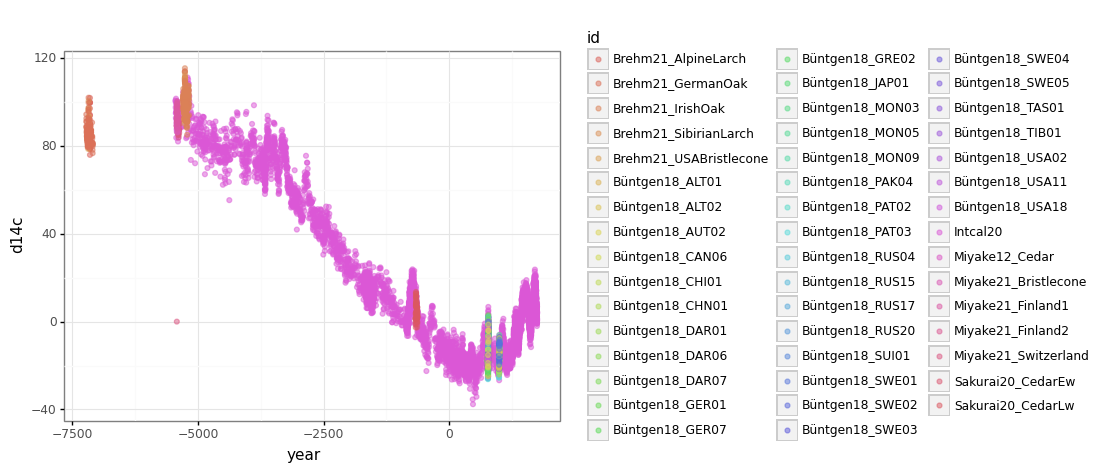

<ggplot: (8754811817629)>

In [138]:
(ggplot(d14c, aes(x="year", y="d14c", color="id"))
    + theme_bw()
    + geom_point(alpha=0.5))

Pick a 100 year block and test the code. So I could fill in the 25 years before and 25 years after with the Intcal20 interpolated curve. Take all of Intcal20 and place the actual data into the interpolated data. This would require rescaling the data with a linear curve or something along those lines. Only test the injection recovery at te real years. 

Linear combination of the basis vectors provided by the template, linear trend and constant.
$Ax = b$ simple linear regression with a 50 by 3 design matrix that is dotted with a 3 long position vector to produce the predicted d14c. The first row is just the template. The second is just rows and the final is just the year.

Resample the data with gaussian noise of the same magnitude as the error bars. Plot the amplitdues as a histogram. Calculate the chi squared statsitic and then do just trend and mean and calculate the difference in chi squared statistic. I choose the significance threshold of the resulting distribution.This gives the false positive rate.

Then you inject a number of small events and see if they are detected based on the thresholds you decided. This gives you the false negative rate. 

Repeating this for every year I can plot the year vs the 50% false positive amplitude of the event. Interpolate over all of the years